<a href="https://colab.research.google.com/github/abdulwali123/ouruniverse/blob/main/Brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ignore the filter warnings**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Extract the dataset**

In [ ]:
!unzip /content/archive.zip



Archive:  /content/archive.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28 no.jpg  
  inflati

**Import the required required libraries**

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
import glob
import math


**count the images contain on the dataset**

In [ ]:
Root_dir="/content/brain_tumor_dataset"
no_of_images={}
for dir in os.listdir(Root_dir):
  no_of_images[dir]=len(os.listdir(os.path.join(Root_dir,dir)))


In [ ]:
no_of_images.items()

dict_items([('no', 98), ('yes', 155)])

**split the dataset**
1. 70% for the training
2. 15% for the  validation
3. 15% for the testing 

In [ ]:
def split_folder(p,split_per):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)
    for dir in os.listdir(Root_dir):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(Root_dir,dir)),size=(math.floor(split_per*no_of_images[dir])-5),replace=False):
        o=os.path.join(Root_dir,dir,img)
        d=os.path.join("./"+p,dir)
        shutil.copy(o,d)
        os.remove(o)

  else:
    print(f"{p} folder exists")



In [ ]:
split_folder("train",0.7)

In [ ]:
split_folder("validation",0.15)

In [ ]:
split_folder("test",0.15)

**Build Model**

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(filters=36,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

**Data augmented**

In [ ]:
def preprocessingImages1(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=(0.2),rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode="binary")
  return image


In [ ]:
train_path="/content/train"
train_data=preprocessingImages1(train_path)

Found 166 images belonging to 2 classes.


In [ ]:
 def preprocessingImages2(path):
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode="binary")
  return image



In [ ]:
test_path="/content/test"
test_data=preprocessingImages1(test_path)

Found 27 images belonging to 2 classes.


In [ ]:
val_path="/content/validation"
val_data=preprocessingImages1(val_path)

Found 27 images belonging to 2 classes.


**Model Checkpoint and early stopping**


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping  

In [ ]:
ES=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, mode='auto')
MC=ModelCheckpoint(monitor="val_accuracy",filepath='./bestmodel.h5' ,verbose=1,  best_save_only=True, mode='auto')
CB=[ES,MC]

**Model Training**

In [ ]:
HS=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=5,
                       verbose=1,
                       callbacks=CB,
                       validation_steps=16,
                       validation_data=val_data,
                       )

**Model Graphical Interpretation**

In [ ]:
H=HS.history
H.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

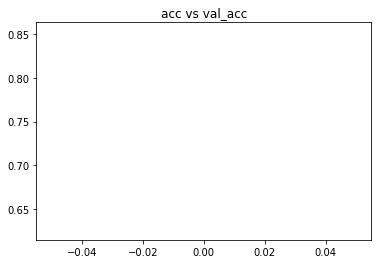

In [ ]:
plt.plot(H["accuracy"])
plt.plot(H["val_accuracy"], c='red')
plt.title("acc vs val_acc")
plt.show()

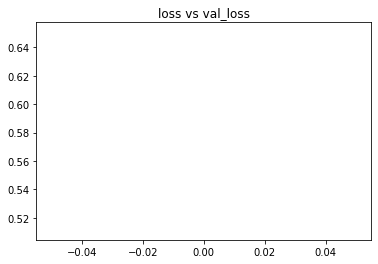

In [ ]:
plt.plot(H["loss"])
plt.plot(H["val_loss"], c='red')
plt.title("loss vs val_loss")
plt.show()

**Model Accuracy**

In [ ]:
from keras.models import load_model
model=load_model("/content/bestmodel.h5")

In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")

the accuracy of our model is 88.88888955116272%


**Randomly test any brain Image**

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array

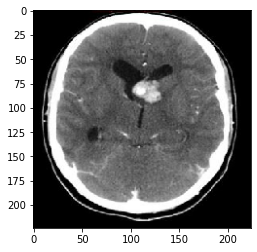

1/1 [==============================] - 0s 63ms/step
the MRI is not having a tumor


In [ ]:
Path='/content/brain_tumor_dataset/no/N1.JPG'
img=load_img(Path,target_size=(224,224))
input_arr=img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr.shape
input_arr=np.expand_dims(input_arr,axis=0)
pred=np.argmax(model.predict(input_arr)[0][0])
pred
if pred==1:
  print("the MRI is having a tumor")
else:
  print("the MRI is not having a tumor")
